#Decision Trees and Hyperparameters

As a Data Scientist at bureau of Meterology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'


In [ ]:
raw_df=pd.read_csv('weatherAUS.csv')

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
raw_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
raw_df.dropna(subset='RainTomorrow',inplace=True)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

**Preparing the Data for Training**

In [ ]:
year=pd.to_datetime(raw_df.Date).dt.year

In [ ]:
train_df=raw_df[year<2015]
val_df=raw_df[year==2015]
test_df=raw_df[year>2015]

In [ ]:
print('train_df.shape',train_df.shape)
print('val_df.shape',val_df.shape)
print('test_df.shape',test_df.shape)

train_df.shape (98988, 23)
val_df.shape (17231, 23)
test_df.shape (25974, 23)


In [ ]:
input_cols=list(train_df.columns)[1:-1]
target_cols='RainTomorrow'

In [ ]:
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_cols].copy()

In [ ]:
val_inputs=val_df[input_cols].copy()
val_targets=val_df[target_cols].copy()

In [ ]:
test_inputs=test_df[input_cols].copy()
test_targets=test_df[target_cols].copy()

In [ ]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,SSE,24.0,26.0,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No
144549,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,SW,19.0,20.0,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No
144550,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,SSE,26.0,9.0,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No
144551,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,SSW,28.0,17.0,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No


In [ ]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
from sklearn.impute import SimpleImputer


In [ ]:
imputer=SimpleImputer(strategy='mean')

In [ ]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [ ]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No
1,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No
2,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No
3,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No
4,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,16.9,33.2,0.0,5.469824,7.624853,SSE,43.0,ESE,SSE,24.0,26.0,22.0,13.0,1014.1,1009.8,4.437189,4.503167,23.7,31.8,No
144549,Uluru,15.1,36.8,0.0,5.469824,7.624853,NE,31.0,ENE,SW,19.0,20.0,16.0,8.0,1012.6,1007.6,4.437189,4.503167,28.9,34.8,No
144550,Uluru,17.3,37.8,0.0,5.469824,7.624853,ESE,39.0,ESE,SSE,26.0,9.0,15.0,8.0,1011.9,1008.0,4.437189,4.503167,29.7,35.7,No
144551,Uluru,20.1,38.5,0.0,5.469824,7.624853,ESE,43.0,ESE,SSW,28.0,17.0,22.0,9.0,1014.0,1009.2,4.437189,4.503167,29.8,37.2,No


In [ ]:
test_inputs[numeric_cols].isna().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


In [ ]:
train_inputs[numeric_cols].isna().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


Scaling Numeric Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler().fit(raw_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

In [ ]:
val_inputs.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000
mean,0.488364,0.535061,0.005761,0.039356,0.529766,0.260422,0.106366,0.212012,0.681702,0.505003,0.635487,0.630258,0.496524,0.500679,0.512768,0.523809
std,0.154157,0.141075,0.022218,0.022895,0.176195,0.097937,0.066591,0.099354,0.197546,0.207120,0.111121,0.107516,0.255261,0.236935,0.143615,0.137566
min,0.007075,0.030246,0.000000,0.000000,0.000000,0.007752,0.000000,0.000000,0.040000,0.000000,0.125620,0.081600,0.000000,0.000000,0.021097,0.026871
25%,0.376179,0.429112,0.000000,0.035862,0.525852,0.193798,0.053846,0.149425,0.560000,0.360000,0.568595,0.564800,0.333333,0.444444,0.409283,0.424184
50%,0.487887,0.525520,0.000000,0.037723,0.525852,0.255814,0.100000,0.214225,0.690000,0.514826,0.614876,0.611200,0.493021,0.500352,0.508439,0.518234
75%,0.601415,0.637051,0.001617,0.037723,0.565517,0.310078,0.146154,0.275862,0.830000,0.640000,0.705785,0.699200,0.666667,0.666667,0.616034,0.618042
max,0.952830,0.948960,0.666307,0.485517,1.000000,1.000000,0.669231,0.850575,1.000000,1.000000,0.971901,0.963200,0.888889,0.888889,0.943038,0.925144


#Encoding Categorical Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')

In [ ]:
encoder.fit(raw_df[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [ ]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [ ]:
encoder_cols=list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
encoder_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [ ]:
train_inputs[encoder_cols]=encoder.transform(train_inputs[categorical_cols])
val_inputs[encoder_cols]=encoder.transform(val_inputs[categorical_cols])
test_inputs[encoder_cols]=encoder.transform(test_inputs[categorical_cols])

<ipython-input-209-5120cfb973f2>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoder_cols]=encoder.transform(train_inputs[categorical_cols])
<ipython-input-209-5120cfb973f2>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoder_cols]=encoder.transform(train_inputs[categorical_cols])
<ipython-input-209-5120cfb973f2>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at o

In [ ]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,Albury,0.681604,0.801512,0.000000,0.037723,0.525852,ENE,0.372093,NaN,ESE,0.000000,0.080460,0.46,0.17,0.543802,0.5136,0.777778,0.333333,0.702532,0.808061,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.037723,0.525852,SSE,0.341085,SSE,SE,0.069231,0.195402,0.54,0.30,0.505785,0.5008,0.888889,0.888889,0.675105,0.712092,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.037723,0.525852,ENE,0.325581,ESE,ENE,0.084615,0.448276,0.62,0.67,0.553719,0.6032,0.888889,0.888889,0.611814,0.477927,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,Albury,0.608491,0.538752,0.042049,0.037723,0.525852,SSE,0.255814,SE,SSE,0.069231,0.195402,0.74,0.65,0.618182,0.6304,0.888889,0.888889,0.556962,0.518234,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
x_train=train_inputs[numeric_cols+encoder_cols]
x_val=val_inputs[numeric_cols+encoder_cols]
x_test=test_inputs[numeric_cols+encoder_cols]

In [ ]:
x_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,0.516509,0.523629,0.001617,0.037723,0.525852,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.500352,0.508439,0.522073,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.375000,0.565217,0.000000,0.037723,0.525852,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.493021,0.500352,0.514768,0.570058,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.504717,0.576560,0.000000,0.037723,0.525852,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.493021,0.222222,0.594937,0.548944,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.417453,0.620038,0.000000,0.037723,0.525852,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.493021,0.500352,0.533755,0.612284,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98988 entries, 0 to 144552
Columns: 119 entries, MinTemp to RainToday_nan
dtypes: float64(119)
memory usage: 90.6 MB


In [ ]:
x_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
count,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.00000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000
mean,0.483557,0.525583,0.006395,0.036934,0.524929,0.265223,0.108470,0.215734,0.686543,0.515015,0.612080,0.608796,0.483856,0.494156,0.506933,0.516827,0.022134,0.021467,0.021306,0.021548,0.020669,0.021447,0.021548,0.022922,0.021508,0.025427,0.021174,0.020972,0.020588,0.023094,0.021427,0.023063,0.006728,0.021467,0.020285,0.021235,0.021225,0.020538,0.021548,0.020215,0.021013,0.006708,0.020609,0.021225,0.021205,0.018861,0.020932,0.023094,0.021235,0.021144,0.020679,0.021235,0.020750,0.024548,0.021235,0.021538,0.021205,0.006324,0.021235,0.019608,0.021225,0.017740,0.020821,0.0211

#Train and Visualizing Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model=DecisionTreeClassifier(random_state=42)

In [ ]:
model.fit(x_train,train_targets)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
train_preds=model.predict(x_train)

In [ ]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
pd.value_counts(train_preds)

<ipython-input-221-5a0b2543de7a>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


,count
No,76707
Yes,22281


In [ ]:
train_probs=model.predict_proba(x_train)

In [ ]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
accuracy_score(train_targets,train_preds)

0.9999797955307714

In [ ]:
model.score(x_val,val_targets)

0.7921188555510418

In [ ]:
val_targets.value_counts()/len(val_targets)

,count
RainTomorrow,
No,0.788289
Yes,0.211711


In [ ]:
model.predict(x_test)

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
accuracy_score(val_targets,model.predict(x_val))

0.7921188555510418

#Visualization

In [ ]:
from sklearn.tree import plot_tree,export_text

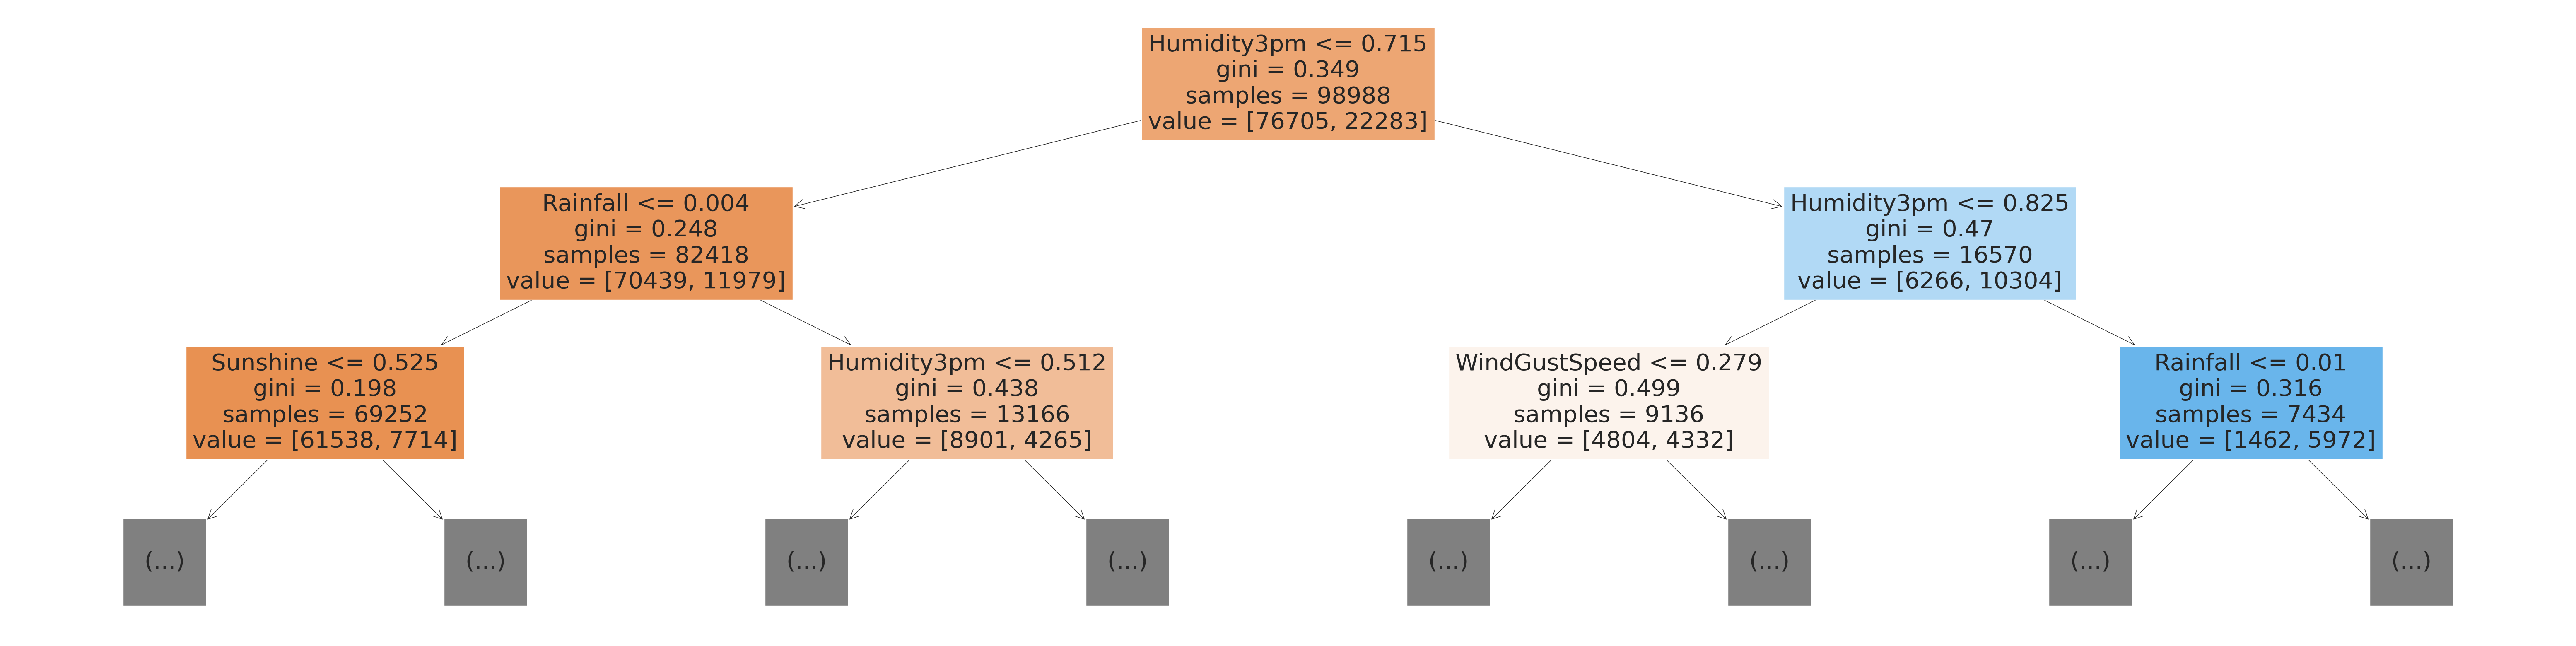

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=x_train.columns, max_depth=2, filled=True);

In [ ]:
model.tree_.max_depth

48

In [ ]:
model.feature_importances_

array([3.48942086e-02, 3.23605486e-02, 5.91385668e-02, 2.49619907e-02,
       4.94652143e-02, 5.63334673e-02, 2.80205998e-02, 2.98128801e-02,
       4.02182908e-02, 2.61441297e-01, 3.44145027e-02, 6.20573699e-02,
       1.36406176e-02, 1.69229866e-02, 3.50001550e-02, 3.04064076e-02,
       2.24086587e-03, 2.08018104e-03, 1.27475954e-03, 7.26936324e-04,
       1.39779517e-03, 1.15264873e-03, 6.92808159e-04, 1.80675598e-03,
       1.08370901e-03, 1.19773895e-03, 8.87119103e-04, 2.15764220e-03,
       1.67094731e-03, 7.98919493e-05, 1.10558668e-03, 1.42008656e-03,
       4.10087635e-04, 1.09028115e-03, 1.44164766e-03, 9.08284767e-04,
       1.05770304e-03, 6.18133455e-04, 1.80387272e-03, 2.10403527e-03,
       2.74413333e-04, 7.31599405e-04, 1.35408990e-03, 1.54759332e-03,
       1.30917564e-03, 1.07134670e-03, 8.36408023e-04, 1.62662229e-03,
       1.00326116e-03, 2.16053455e-03, 8.46802258e-04, 1.88919081e-03,
       9.29325203e-04, 1.29545157e-03, 1.27604831e-03, 5.12736888e-04,
      

In [ ]:
importance_df=pd.DataFrame({'feature':x_train.columns,
                            'importance':model.feature_importances_
                            }).sort_values('importance',ascending=False)


In [ ]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.261441
11,Pressure3pm,0.062057
2,Rainfall,0.059139
5,WindGustSpeed,0.056333
4,Sunshine,0.049465
8,Humidity9am,0.040218
14,Temp9am,0.035000
0,MinTemp,0.034894
10,Pressure9am,0.034415
1,MaxTemp,0.032361


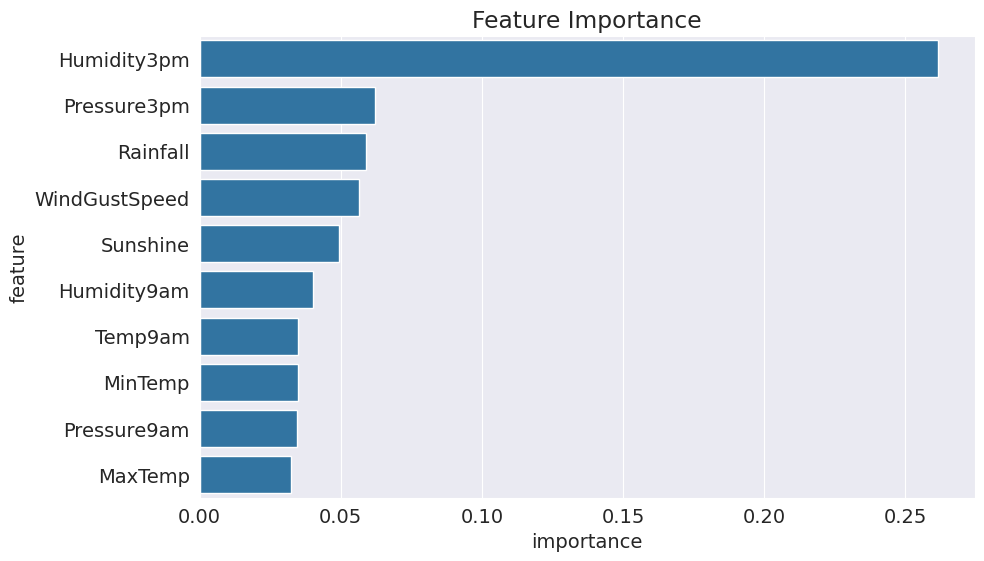

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

#Hyperparameter Tuning and Overfitting

In [ ]:
def max_depth_scores(md):
    model=DecisionTreeClassifier(max_depth=md,random_state=42)
    model.fit(x_train,train_targets)
    train_acc=1-model.score(x_train,train_targets)
    val_acc=1-model.score(x_val,val_targets)
    return {'Max Depth':md,'Training Error':train_acc,'Validation Error':val_acc}

In [ ]:
error_df=pd.DataFrame([max_depth_scores(md) for md in range(1,21)])

In [ ]:
error_df

,Max Depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.158029
8,9,0.140906,0.156578
9,10,0.132945,0.157333


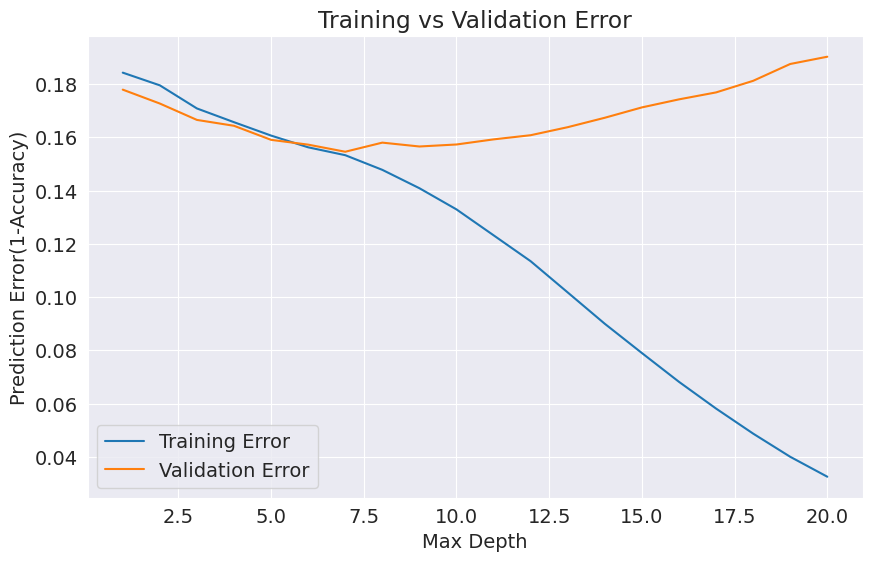

In [ ]:
plt.figure()
plt.plot(error_df['Max Depth'],error_df['Training Error'])
plt.plot(error_df['Max Depth'],error_df['Validation Error'])
plt.title('Training vs Validation Error')
plt.xlabel('Max Depth')
plt.ylabel('Prediction Error(1-Accuracy)')
plt.legend(['Training Error','Validation Error'])

In [ ]:
model=DecisionTreeClassifier(max_depth=5,random_state=42)
model.fit(x_train,train_targets)
model.score(x_val,val_targets)

0.8409262375950322

#Max_lead_nodes

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches to the tree to have varying depths

In [ ]:
model=DecisionTreeClassifier(max_leaf_nodes=128,random_state=42)
model.fit(x_train,train_targets)


DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [ ]:
model.score(x_val,val_targets)

0.8442342290058615

In [ ]:
model.score(x_train,train_targets)

0.8480421869317493

In [ ]:
accuracy_score(val_targets,model.predict(x_val))

0.8442342290058615

In [ ]:
accuracy_score(test_targets,model.predict(x_test))

0.8321398321398321

In [ ]:
model.score(x_val, val_targets)

0.8442342290058615

In [ ]:
model.tree_.max_depth

12

#EXERCISE:
 A more advanced technique (but less commonly used technique) for reducing overfitting in decision trees is known as cost-complexity pruning. Learn more about it here: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html . Implement cost complexity pruning. Do you see any improvement in the validation accuracy?

#Training a Random Forest
While turing the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called **random forest model**

The key idea here is that each decision tree in the forest will make different kinds of errors and upn averaging,many of their errors will cancel out. This idea is also commonly known as the "wisdom of the crowd"

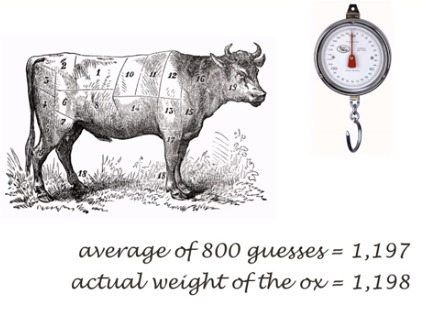

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier(n_jobs=-1,random_state=42)

n_jobs allows the random forest to use multiple parallel workers to train decision trees, and random_state=42 ensures that the we get the same results for each execution

In [ ]:
%%time
model.fit(x_train,train_targets)

CPU times: user 43.2 s, sys: 268 ms, total: 43.4 s
Wall time: 26.1 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model.score(x_train,train_targets)

0.9999494888269285

In [ ]:
model.score(x_val,val_targets)

0.8566537055307295

Once again, the training accuracy is almost 100%, but this time the validation accuracy is much better. In fact, it is better than the best single decision tree we had trained so far. Do you see the power of random forests?

This general technique of combining the results of many models is called "ensembling", it works because most errors of individual models cancel out on averaging. Here's what it looks like visually:

In [ ]:
train_probs=model.predict_proba(x_train)

In [ ]:
train_probs

array([[0.93, 0.07],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.96, 0.04]])

We can access individual decision trees using model.estimators_

In [ ]:
# model.estimators_

In [ ]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

In [ ]:
# prompt: Verify that none of the individual decision trees have a better validation accuracy than the random forest.
%%time
# for tree in model.estimators_:
#   tree_pred = tree.predict(x_val)
#   # val_targets.map({'yes':1,'no':0})
#   tree_accuracy = accuracy_score(val_targets, tree_pred)
#   if tree_accuracy > model.score(x_val, val_targets):
#     print("Found a tree with better accuracy than the random forest!")
#     print(f"Tree accuracy: {tree_accuracy}")
#     print(f"Random forest accuracy: {model.score(x_val, val_targets)}")
#     break
# else:
#   print("No individual tree has better validation accuracy than the random forest.")


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [ ]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

In [ ]:
importance_df=pd.DataFrame({
    'feature':x_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.139904
4,Sunshine,0.053696
11,Pressure3pm,0.052713
8,Humidity9am,0.050051
2,Rainfall,0.048077
10,Pressure9am,0.047944
5,WindGustSpeed,0.047477
15,Temp3pm,0.044379
1,MaxTemp,0.041865
0,MinTemp,0.041199


In [ ]:
base_model=RandomForestClassifier(random_state=42,n_jobs=-1).fit(x_train,train_targets)

In [ ]:
train_targets

,RainTomorrow
0,No
1,No
2,No
3,No
4,No
...,...
144548,No
144549,No
144550,No
144551,No


In [ ]:
base_train_acc=base_model.score(x_train,train_targets)
base_val_acc=base_model.score(x_val,val_targets)

In [ ]:
base_accs=base_train_acc,base_val_acc
base_accs
# base accuracy

(0.9999494888269285, 0.8566537055307295)

We can use this as a benchmark for hyperparameter tuning

**n_estimators**

This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimatores as needed

**For 10 estimators**

In [ ]:
%%time
model=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=10)

CPU times: user 62 µs, sys: 1 µs, total: 63 µs
Wall time: 68.2 µs


In [ ]:
model.fit(x_train,train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [ ]:
model.score(x_train,train_targets),model.score(x_val,val_targets)

(0.986958015112943, 0.8485868492832686)

In [ ]:
base_accs

(0.9999494888269285, 0.8566537055307295)

**FOR 500 estimators**

In [ ]:

model=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=500)



In [ ]:
model.fit(x_train,train_targets)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
model.score(x_val,val_targets)

0.8577563693343393

In [ ]:
model.score(x_train,train_targets)

0.9999797955307714

max_depth and max_leaf_nodes


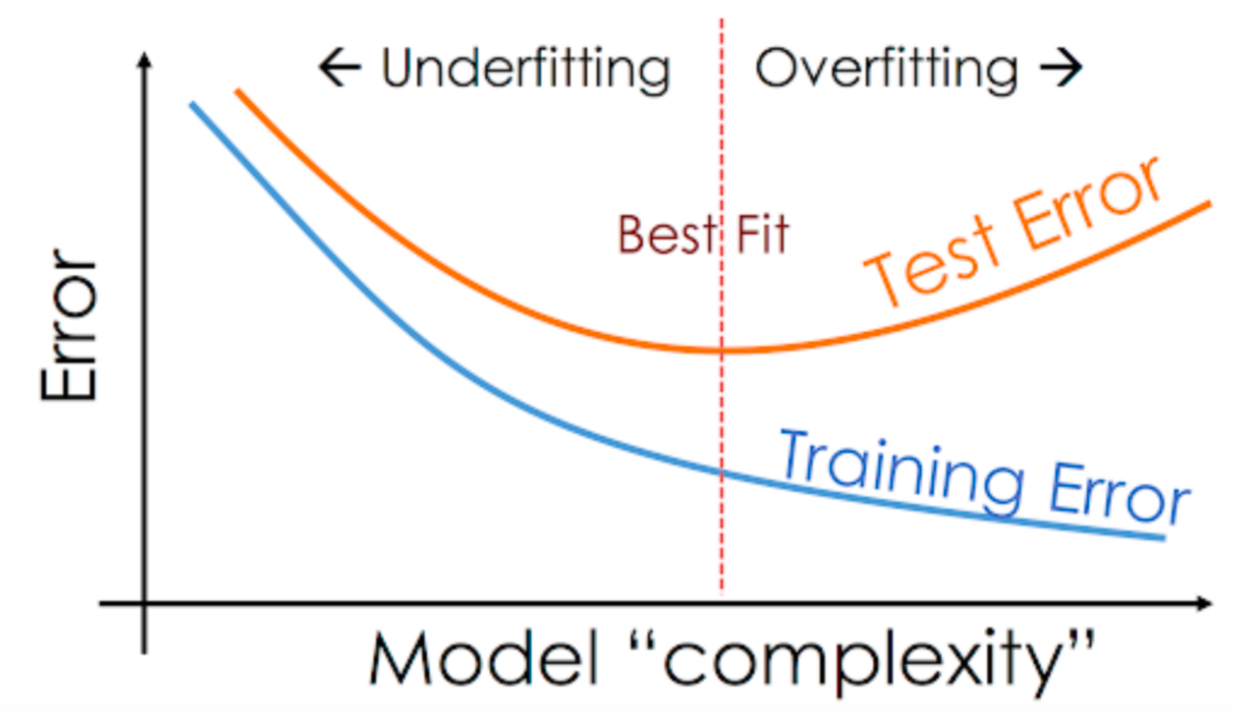

In [ ]:
def test_params(**params):
  model=RandomForestClassifier(random_state=42,n_jobs=-1,**params)
  model.fit(x_train,train_targets)
  return model.score(x_train,train_targets),model.score(x_val,val_targets)

In [ ]:
test_params(max_depth=5)

(0.8197862367155615, 0.8240961058557251)

In [ ]:
test_params(max_leaf_nodes=2**5)

(0.8314341132258456, 0.833904010214149)

In [ ]:
test_params(max_features='log2')

(0.9999595910615429, 0.8558992513493123)

In [ ]:
test_params(max_features=3)

(0.9999494888269285, 0.8543323080494458)

In [ ]:
test_params(max_features=6)

(0.9999595910615429, 0.8558992513493123)

In [ ]:
base_accs

(0.9999494888269285, 0.8566537055307295)

min_samples_split and min_samples_leaf

In [ ]:
test_params(min_samples_split=3, min_samples_leaf=2)

(0.9625005051117307, 0.8565956705936975)

In [ ]:
test_params(min_samples_split=100, min_samples_leaf=60)


(0.8495676243585081, 0.8451047530613429)

In [ ]:
base_accs

(0.9999494888269285, 0.8566537055307295)

min_impurity_decrease

In [ ]:
test_params(min_impurity_decrease=1e-7)

(0.9996060128500425, 0.8561313910974406)

In [ ]:
test_params(min_impurity_decrease=1e-2)

(0.774891906089627, 0.7882885497069235)

In [ ]:
base_accs

(0.9999494888269285, 0.8566537055307295)

bootstrap,max_samples

Bootstrapping helps the random forest generalize better, because each decision tree only sees a fraction of the training set, and some rows randomly get higher weightage than others.

In [ ]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8567697754047937)

In [ ]:
base_accs

(0.9999494888269285, 0.8566537055307295)

Class_Weight

In [ ]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
test_params(class_weight='balanced')

(0.9999595910615429, 0.8553769369160235)

In [ ]:
test_params(class_weight={'No':1,'Yes':2})

(0.9999595910615429, 0.8558412164122802)

In [ ]:
base_accs

(0.9999494888269285, 0.8566537055307295)

#Putting it Together

In [ ]:
%%time
model=RandomForestClassifier(n_jobs=-1,
                             random_state=42,
                             n_estimators=500,
                             max_features=7,
                             max_depth=30,
                             class_weight={'No':1,'Yes':1.5})

CPU times: user 55 µs, sys: 1e+03 ns, total: 56 µs
Wall time: 59.1 µs


In [ ]:
%%time
model.fit(x_train,train_targets)

CPU times: user 2min 37s, sys: 1.76 s, total: 2min 39s
Wall time: 1min 34s


RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [ ]:
model.score(x_train,train_targets),model.score(x_val,val_targets)

(0.9920192346547057, 0.8563054959085369)

In [ ]:
base_accs

(0.9999494888269285, 0.8566537055307295)

In [ ]:
model.score(x_test,test_targets)

0.8451913451913452